In [13]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point
from datetime import timedelta
import movingpandas as mpd
import matplotlib.pyplot as plt

In [14]:
def read_one_user(n):
    user_path = '../Data/0'+str(n)+'/labels.txt'
    transport_df = pd.read_csv(user_path, sep="\t")
    
    directory = '../Data/0'+str(n)+'/Trajectory'
    
    gps_points_df = pd.DataFrame(columns=['time', 'lat', 'lon', 'alt', 'identifier'])
    for filename in os.listdir(directory):
        dt_object = datetime.strptime(filename[:-4], '%Y%m%d%H%M%S')
        for index, row in transport_df.iterrows():
            start = datetime.strptime(row['Start Time'],'%Y/%m/%d %H:%M:%S')
            end = datetime.strptime(row['End Time'],'%Y/%m/%d %H:%M:%S')
            if dt_object >= start and dt_object <= end:
                file_df = pd.read_csv(directory+'/'+filename, skiprows=6, header=None,
                         parse_dates=[[5, 6]], infer_datetime_format=True)
                file_df.rename(inplace=True, columns={'5_6': 'time', 0: 'lat', 1: 'lon', 3: 'alt'})
                file_df.drop(inplace=True, columns=[2, 4])
                file_df['identifier'] = index
                file_df['geometry'] = [Point(lon, lat) for lon, lat in 
                             zip(file_df['lon'].to_list(), file_df['lat'].to_list())]
                gps_points_df = pd.concat([gps_points_df,file_df])
                
    return transport_df,gps_points_df

start = datetime.now()
transport_df,gps_points_df = read_one_user(10)

end = datetime.now()
print('Tempo gasto:',end-start)

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer w

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer w

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer w

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Tempo gasto: 0:00:34.970186


In [15]:
transport_df

,Start Time,End Time,Transportation Mode
0,2007/06/26 11:32:29,2007/06/26 11:40:29,bus
1,2008/03/28 14:52:54,2008/03/28 15:59:59,train
2,2008/03/28 16:00:00,2008/03/28 22:02:00,train
3,2008/03/29 01:27:50,2008/03/29 15:59:59,train
4,2008/03/29 16:00:00,2008/03/30 15:59:59,train
...,...,...,...
429,2008/12/07 10:30:54,2008/12/07 10:34:14,taxi
430,2008/12/07 10:59:29,2008/12/07 11:29:48,train
431,2008/12/07 11:43:12,2008/12/07 12:23:26,bus
432,2008/12/07 12:23:34,2008/12/07 12:25:07,walk


In [16]:
gps_points_df

,time,lat,lon,alt,identifier,geometry
0,2008-03-28 16:00:01,39.50293,116.714948,-777,2,POINT (116.714948 39.50293)
1,2008-03-28 16:01:00,39.497045,116.726137,-777,2,POINT (116.726137 39.497045)
2,2008-03-28 16:01:59,39.489695,116.740047,-777,2,POINT (116.740047 39.489695)
3,2008-03-28 16:02:59,39.481438,116.755648,-777,2,POINT (116.755648 39.481438)
4,2008-03-28 16:03:58,39.472748,116.770972,-777,2,POINT (116.770972 39.472748)
...,...,...,...,...,...,...
3691,2008-12-07 12:37:24,39.991644,116.326376,184,427,POINT (116.326376 39.991644)
3692,2008-12-07 12:37:25,39.991641,116.326325,180,427,POINT (116.326325 39.991641)
3693,2008-12-07 12:37:26,39.991641,116.326289,177,427,POINT (116.326289 39.991641)
3694,2008-12-07 12:37:27,39.991643,116.326273,174,427,POINT (116.326273 39.991643)


In [41]:
start = datetime.now()

gps_points_geometry_df = gps_points_df

# Creating a Geodataframe. Be aware it is CRS 4326 WGS84
# A GeoDataFrame object is a pandas.DataFrame that has a column with geometry
# It has one GeoSeries column that holds a special status. 
# This GeoSeries is referred to as the GeoDataFrame’s “geometry”. 
# A GeoSeries is essentially a vector where each entry in the vector is a set 
# of shapes corresponding to one observation.
geodata = gpd.GeoDataFrame(gps_points_geometry_df, crs = CRS.from_epsg('4326'))
geodata = geodata.set_index('time')

geo = datetime.now()
print('Tempo gasto criando geodata:',geo-start)

# Create a Trajectory Collection with Movingpandas
# data(list[Trajectory] or GeoDataFrame or DataFrame)–List of Trajectory 
#     objects or a GeoDataFrame with trajectory IDs, point geometry column 
#     and timestamp index
# traj_id_col(string)–Name of the GeoDataFrame column containing trajectory IDs
traj_collection = mpd.TrajectoryCollection(geodata, 'identifier')

traj = datetime.now()
print('Tempo gasto criando TrajectoryCollection:',traj-geo)


'''
Since each transportation mode must have different parameters for stop point detecion, maybe the part below should be done
inside a for loop tha checks the transport mode before setting the parameters.
Read https://www.researchgate.net/publication/259322953_Trip_Reconstruction_and_Transportation_Mode_Extraction_on_Low_Data_Rate_GPS_Data_from_Mobile_Phone
Maybe select another stop point detection algorithm
'''


# Detects stops in a trajectory. A stop is detected if the movement stays 
# within an area of specified size for at least the specified duration.
# Define parameters in Hours and Search radius in meters
Hours = .01
SearchRadio = 1000
stops = mpd.TrajectoryStopDetector(traj_collection).get_stop_segments(min_duration=timedelta(hours=Hours), max_diameter=SearchRadio)

trajstop = datetime.now()
print('Tempo gasto criando stops df:',trajstop-traj)

stops

Tempo gasto criando geodata: 0:00:00.564694
Tempo gasto criando TrajectoryCollection: 0:03:03.465803


C:\ProgramData\Miniconda3\lib\site-packages\movingpandas\geometry_utils.py:150: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(geom) == 2:
C:\ProgramData\Miniconda3\lib\site-packages\movingpandas\geometry_utils.py:151: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return _measure_distance(geom[0], geom[1], spherical)


Tempo gasto criando stops df: 0:19:02.968517


TrajectoryCollection with 7286 trajectories

In [42]:
# Create a new Geodataframe and define geometry column
stops_start = gpd.GeoDataFrame(columns = ['geometry'])
stops_start = stops_start.set_geometry('geometry')

# Add the ID of each stop track and define it as index
stops_start['stop_id'] = [track.id for track in stops.trajectories]
stops_start= stops_start.set_index('stop_id')
stops_start

,geometry
stop_id,
2_2008-03-28 16:25:43,None
2_2008-03-28 16:28:41,None
2_2008-03-28 16:31:38,None
2_2008-03-28 16:34:36,None
2_2008-03-28 16:38:32,None
...,...
427_2008-12-07 12:22:22,None
427_2008-12-07 12:26:52,None
427_2008-12-07 12:27:42,None


In [43]:
# Iteration over the Stop Trajectories
for stoptrack in stops.trajectories:

    # add stop duration in hours
    stops_start.at[stoptrack.id,'duration_h'] =stoptrack.get_duration().total_seconds()/3600

    # add length
    stops_start.at[stoptrack.id, 'length_m']=stoptrack.get_length()

    # add bird name
    stops_start.at[stoptrack.id, 'identifier']=stoptrack.id.split('_')[0]

    # add datetime
    stops_start.at[stoptrack.id, 'datetime']= pd.to_datetime(stoptrack.id.split('_')[1]).tz_localize(None)

    # geometry with start point
    stops_start.at[stoptrack.id, 'geometry'] = stoptrack.get_start_location()
    
# Reset indexes
stops_start = stops_start.reset_index(drop=True)
geodata = geodata.reset_index(drop=True)

In [44]:
stops_start

,geometry,duration_h,length_m,identifier,datetime
0,POINT (117.13302 39.25820),0.016389,845.778851,2,2008-03-28 16:25:43
1,POINT (117.14632 39.24027),0.016389,950.424629,2,2008-03-28 16:28:41
2,POINT (117.16538 39.21457),0.016389,867.807036,2,2008-03-28 16:31:38
3,POINT (117.17212 39.20545),0.032778,953.939302,2,2008-03-28 16:34:36
4,POINT (117.19203 39.18507),0.016667,731.025343,2,2008-03-28 16:38:32
...,...,...,...,...,...
7281,POINT (116.35219 39.96621),0.074444,1806.899488,427,2008-12-07 12:22:22
7282,POINT (116.34837 39.96884),0.013333,984.277765,427,2008-12-07 12:26:52
7283,POINT (116.34776 39.97805),0.028333,994.322592,427,2008-12-07 12:27:42
7284,POINT (116.34726 39.98720),0.046667,1352.394059,427,2008-12-07 12:29:26


In [45]:
geodata

,lat,lon,alt,identifier,geometry
0,39.50293,116.714948,-777,2,POINT (116.71495 39.50293)
1,39.497045,116.726137,-777,2,POINT (116.72614 39.49704)
2,39.489695,116.740047,-777,2,POINT (116.74005 39.48969)
3,39.481438,116.755648,-777,2,POINT (116.75565 39.48144)
4,39.472748,116.770972,-777,2,POINT (116.77097 39.47275)
...,...,...,...,...,...
535851,39.991644,116.326376,184,427,POINT (116.32638 39.99164)
535852,39.991641,116.326325,180,427,POINT (116.32632 39.99164)
535853,39.991641,116.326289,177,427,POINT (116.32629 39.99164)
535854,39.991643,116.326273,174,427,POINT (116.32627 39.99164)


In [46]:
geodata['identifier'].value_counts()

221    56785
259    45137
24     42055
227    40797
248    39434
       ...  
353      850
5        818
88       751
4        716
391      663
Name: identifier, Length: 83, dtype: int64

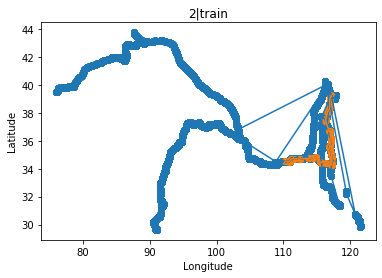

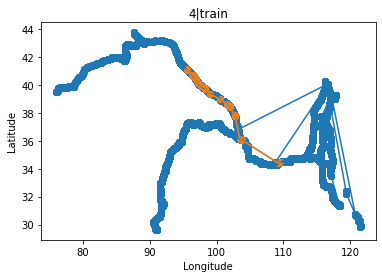

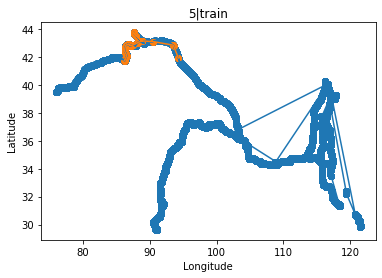

In [ ]:
######### compare points in stops_start and geodata. 
######### try plottinh each batch of stops_start points by traj ID
ids = stops_start['identifier'].unique()
for i in ids[:5]:
    filtered_stops = stops_start[stops_start['identifier']==i]
    lat_stops = [p.y for p in filtered_stops['geometry']]
    lon_stops = [p.x for p in filtered_stops['geometry']]
    
    filtered_trajs = geodata[geodata['identifier']==i]
    lat_traj = [p.y for p in geodata['geometry']]
    lon_traj = [p.x for p in geodata['geometry']]
    
    plt.scatter(lon_traj,lat_traj)
    plt.plot(lon_traj,lat_traj)
    
    plt.scatter(lon_stops,lat_stops)
    plt.plot(lon_stops,lat_stops)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    title = i+'|'+transport_df.at[int(i),'Transportation Mode']
    plt.title(title)
    
    plt.show()

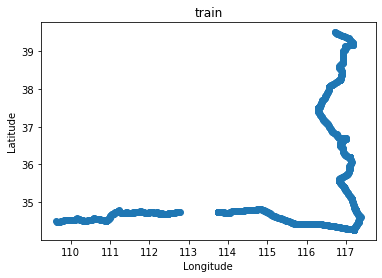

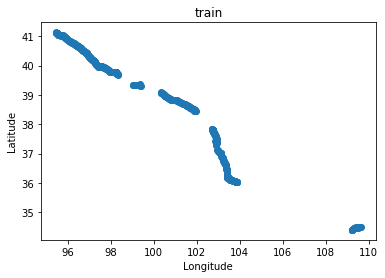

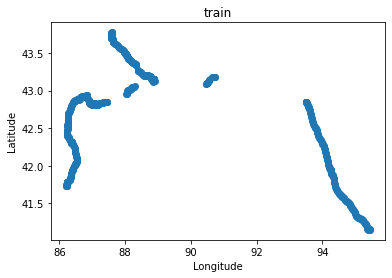

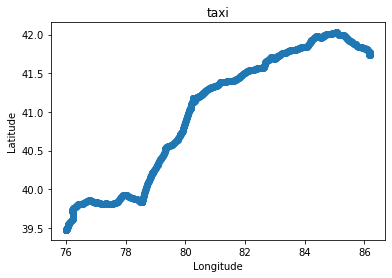

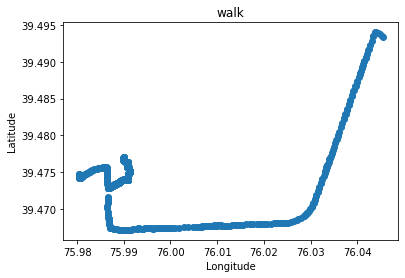

In [4]:
# import matplotlib.pyplot as plt

# def draw_motif(transport_df,gps_points_df):
#     ids = gps_points_df['identifier'].unique()
#     for i in ids[:5]:
#         single_mode_df = gps_points_df[gps_points_df['identifier']==i]
#         plt.scatter(x=single_mode_df['lon'], y=single_mode_df['lat'])
#         plt.xlabel('Longitude')
#         plt.ylabel('Latitude')
#         plt.title(transport_df.at[i,'Transportation Mode'])
#         plt.show()
        
# draw_motif(transport_df,gps_points_df)

#     stops = stops_start['geometry'].tolist()
#     print('stops #######################\n',stops)
#     xs = [point.x for point in stops]
#     ys = [point.y for point in stops]
#     plt.scatter(xs, ys)
#     plt.plot(xs, ys)
#     plt.title('Transport Mode:'+transport_df.at[i,'Transportation Mode'])
#     plt.show()